In [1]:
#https://journalofbigdata.springeropen.com/articles/10.1186/s40537-018-0138-3
#https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/Prescriber_Methods.pdf
#https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/Prescriber_Methods.pdf
#https://oig.hhs.gov/exclusions/exclusions_list.asp - LEIE Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Part D data can be considered to provide procedure-level information.
my_list = []
for chunk in  pd.read_csv(r'D:\Data _Science\IndependentResearch\provider_charge_data\Medicare_Part_D_Prescribers_by_Provider_and_Drug_2019_12_31\Medicare_Part_D_Prescribers_by_Provider_and_Drug_2019_12_31.csv', chunksize=20000,encoding='latin-1',low_memory=False, error_bad_lines = False):
    my_list.append(chunk)


In [3]:
df= pd.concat(my_list, axis= 0)

In [4]:
df.head()

,Prscrbr_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_City,Prscrbr_State_Abrvtn,Prscrbr_State_FIPS,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,...,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes,GE65_Sprsn_Flag,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Bene_Sprsn_Flag,GE65_Tot_Benes
0,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Amiodarone Hcl,Amiodarone Hcl,...,360,150.76,NaN,NaN,13.0,13.0,150.76,360.0,*,NaN
1,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Amlodipine Besylate,Amlodipine Besylate,...,780,92.81,12.0,NaN,22.0,26.0,92.81,780.0,NaN,12.0
2,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Atorvastatin Calcium,Atorvastatin Calcium,...,1482,373.60,22.0,NaN,41.0,50.0,373.60,1482.0,NaN,22.0
3,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Azithromycin,Azithromycin,...,77,132.57,15.0,#,NaN,NaN,NaN,NaN,#,NaN
4,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Carvedilol,Carvedilol,...,787,118.53,11.0,NaN,21.0,27.0,118.53,787.0,NaN,11.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25401870 entries, 0 to 25401869
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Prscrbr_NPI            int64  
 1   Prscrbr_Last_Org_Name  object 
 2   Prscrbr_First_Name     object 
 3   Prscrbr_City           object 
 4   Prscrbr_State_Abrvtn   object 
 5   Prscrbr_State_FIPS     object 
 6   Prscrbr_Type           object 
 7   Prscrbr_Type_Src       object 
 8   Brnd_Name              object 
 9   Gnrc_Name              object 
 10  Tot_Clms               int64  
 11  Tot_30day_Fills        float64
 12  Tot_Day_Suply          int64  
 13  Tot_Drug_Cst           float64
 14  Tot_Benes              float64
 15  GE65_Sprsn_Flag        object 
 16  GE65_Tot_Clms          float64
 17  GE65_Tot_30day_Fills   float64
 18  GE65_Tot_Drug_Cst      float64
 19  GE65_Tot_Day_Suply     float64
 20  GE65_Bene_Sprsn_Flag   object 
 21  GE65_Tot_Benes         float64
dtypes: float64(8), i

In [6]:
df.describe()

,Prscrbr_NPI,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Tot_Benes
count,2.540187e+07,2.540187e+07,2.540187e+07,2.540187e+07,2.540187e+07,1.070614e+07,1.402100e+07,1.402100e+07,1.402100e+07,1.402100e+07,2.589094e+06
mean,1.499506e+09,5.097666e+01,8.669875e+01,2.433167e+03,5.394291e+03,3.012260e+01,4.962052e+01,8.759334e+01,4.886409e+03,2.487666e+03,3.333644e+01
std,2.877596e+08,1.272163e+02,1.845877e+02,4.700585e+03,3.749361e+04,1.039127e+02,1.488382e+02,2.084941e+02,3.666938e+04,5.024198e+03,1.961413e+02
min,1.003000e+09,1.100000e+01,1.100000e+01,1.000000e+01,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.245673e+09,1.500000e+01,2.100000e+01,4.800000e+02,2.621900e+02,1.400000e+01,1.300000e+01,1.800000e+01,2.248300e+02,4.250000e+02,1.300000e+01
50%,1.497925e+09,2.400000e+01,3.800000e+01,1.020000e+03,6.713800e+02,2.000000e+01,2.200000e+01,3.600000e+01,6.200600e+02,9.900000e+02,1.900000e+01
75%,1.740720e+09,5.000000e+01,8.200000e+01,2.310000e+03,2.161750e+03,3.300000e+01,4.700000e+01,8.000000e+01,2.035420e+03,2.250000e+03,3.400000e+01
max,1.993000e+09,1.993870e+05,2.047677e+05,6.066460e+05,3.343712e+07,1.418610e+05,1.906370e+05,1.957407e+05,3.196401e+07,5.928350e+05,1.355460e+05


## 1. Inspecting the null % 

In [7]:
colnames=(df.isnull().sum()*100/len(df)) 
colnames

Prscrbr_NPI               0.000000
Prscrbr_Last_Org_Name     0.000000
Prscrbr_First_Name        0.000000
Prscrbr_City              0.000000
Prscrbr_State_Abrvtn      0.000000
Prscrbr_State_FIPS        0.000000
Prscrbr_Type              0.000008
Prscrbr_Type_Src          0.000000
Brnd_Name                 0.000000
Gnrc_Name                 0.000000
Tot_Clms                  0.000000
Tot_30day_Fills           0.000000
Tot_Day_Suply             0.000000
Tot_Drug_Cst              0.000000
Tot_Benes                57.852938
GE65_Sprsn_Flag          55.196728
GE65_Tot_Clms            44.803272
GE65_Tot_30day_Fills     44.803272
GE65_Tot_Drug_Cst        44.803272
GE65_Tot_Day_Suply       44.803272
GE65_Bene_Sprsn_Flag     10.192533
GE65_Tot_Benes           89.807467
dtype: float64

### Inference 
- Tot_Benes                57.852938
- GE65_Sprsn_Flag          55.196728
- GE65_Tot_Clms            44.803272
- GE65_Tot_30day_Fills     44.803272
- GE65_Tot_Drug_Cst        44.803272
- GE65_Tot_Day_Suply       44.803272
- GE65_Bene_Sprsn_Flag     10.192533
- GE65_Tot_Benes           89.807467

GE65_Tot_Benes seems to have a lot of nulls this column might not be of use . 



In [8]:
cat_vals = df.select_dtypes(include=['object']).columns
cat_vals=cat_vals.to_list()
cat_vals

['Prscrbr_Last_Org_Name',
 'Prscrbr_First_Name',
 'Prscrbr_City',
 'Prscrbr_State_Abrvtn',
 'Prscrbr_State_FIPS',
 'Prscrbr_Type',
 'Prscrbr_Type_Src',
 'Brnd_Name',
 'Gnrc_Name',
 'GE65_Sprsn_Flag',
 'GE65_Bene_Sprsn_Flag']

## GETTING THE UPDATED LEIE DATA

In [9]:
df_leie = pd.read_csv(r'D:\Data _Science\IndependentResearch\provider_charge_data\UPDATED_LEIE.csv')
df_leie.head(5)

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LASTNAME,FIRSTNAME,MIDNAME,BUSNAME,GENERAL,SPECIALTY,UPIN,NPI,DOB,ADDRESS,CITY,STATE,ZIP,EXCLTYPE,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE
0,NaN,NaN,,"#1 MARKETING SERVICE, INC",OTHER BUSINESS,SOBER HOME,NaN,0,NaN,239 BRIGHTON BEACH AVENUE,BROOKLYN,NY,11235,1128a1,20200319,0,0,NaN
1,NaN,NaN,,14 LAWRENCE AVE PHARMACY,PHARMACY,NaN,NaN,0,NaN,14 LAWRENCE AVENUE,SMITHTOWN,NY,11787,1128a1,19880830,0,0,NaN
2,NaN,NaN,,143 MEDICAL EQUIPMENT CO,DME COMPANY,DME - OXYGEN,NaN,0,NaN,701 NW 36 AVENUE,MIAMI,FL,33125,1128b7,19970620,0,0,NaN
3,NaN,NaN,,184TH STREET PHARMACY CORP,OTHER BUSINESS,PHARMACY,NaN,1922348218,NaN,69 E 184TH ST,BRONX,NY,10468,1128a1,20180419,0,0,NaN
4,NaN,NaN,,1951 FLATBUSH AVENUE PHARMACY,PHARMACY,NaN,NaN,0,NaN,1951 FLATBUSH AVE,BROOKLYN,NY,11234,1128b5,20090319,0,0,NaN


### We will consider those where NPI is not 0 and will consider only 2 columns  NPI and EXCLTYPE

In [10]:
df_leie_rq = df_leie.loc[:,['NPI','EXCLTYPE']]
df_leie_rq.head()

,NPI,EXCLTYPE
0,0,1128a1
1,0,1128a1
2,0,1128b7
3,1922348218,1128a1
4,0,1128b5


In [11]:
df_leie_rq = df_leie_rq.query('NPI !=0')
df_leie_rq.head()

,NPI,EXCLTYPE
3,1922348218,1128a1
23,1942476080,1128b8
27,1275600959,1128a1
30,1891731758,1128b8
58,1851631543,1128b7


In [12]:
rename_dict = {'NPI':'Prscrbr_NPI', 'EXCLTYPE':'is_fraud'} 
df_leie_rq = df_leie_rq.rename(columns=rename_dict)

In [13]:
df_leie_rq['is_fraud'] = 1 #These NPI are included in exclusion list , lets consider this as fraudulent records for now.
df_leie_rq.head()

,Prscrbr_NPI,is_fraud
3,1922348218,1
23,1942476080,1
27,1275600959,1
30,1891731758,1
58,1851631543,1


### Merge the NPI data and the Prscrbr Data 

In [14]:
df_complete= pd.merge(df, df_leie_rq, on='Prscrbr_NPI' , how = 'left')

In [15]:
import gc

del [[df]]
gc.collect()

93

In [16]:
df_complete.head()

,Prscrbr_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_City,Prscrbr_State_Abrvtn,Prscrbr_State_FIPS,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,...,Tot_Drug_Cst,Tot_Benes,GE65_Sprsn_Flag,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Bene_Sprsn_Flag,GE65_Tot_Benes,is_fraud
0,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Amiodarone Hcl,Amiodarone Hcl,...,150.76,NaN,NaN,13.0,13.0,150.76,360.0,*,NaN,NaN
1,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Amlodipine Besylate,Amlodipine Besylate,...,92.81,12.0,NaN,22.0,26.0,92.81,780.0,NaN,12.0,NaN
2,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Atorvastatin Calcium,Atorvastatin Calcium,...,373.60,22.0,NaN,41.0,50.0,373.60,1482.0,NaN,22.0,NaN
3,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Azithromycin,Azithromycin,...,132.57,15.0,#,NaN,NaN,NaN,NaN,#,NaN,NaN
4,1003000126,Enkeshafi,Ardalan,Cumberland,MD,24,Internal Medicine,S,Carvedilol,Carvedilol,...,118.53,11.0,NaN,21.0,27.0,118.53,787.0,NaN,11.0,NaN


In [17]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25401870 entries, 0 to 25401869
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Prscrbr_NPI            int64  
 1   Prscrbr_Last_Org_Name  object 
 2   Prscrbr_First_Name     object 
 3   Prscrbr_City           object 
 4   Prscrbr_State_Abrvtn   object 
 5   Prscrbr_State_FIPS     object 
 6   Prscrbr_Type           object 
 7   Prscrbr_Type_Src       object 
 8   Brnd_Name              object 
 9   Gnrc_Name              object 
 10  Tot_Clms               int64  
 11  Tot_30day_Fills        float64
 12  Tot_Day_Suply          int64  
 13  Tot_Drug_Cst           float64
 14  Tot_Benes              float64
 15  GE65_Sprsn_Flag        object 
 16  GE65_Tot_Clms          float64
 17  GE65_Tot_30day_Fills   float64
 18  GE65_Tot_Drug_Cst      float64
 19  GE65_Tot_Day_Suply     float64
 20  GE65_Bene_Sprsn_Flag   object 
 21  GE65_Tot_Benes         float64
 22  is_fraud        

Total number of rows in the dataset is 25,401,869. which is impossible to process with local resources as it almost consumes 4.2 gb of data.
So taking a saple from the dataset.100,000 records

In [18]:
df_subset= df_complete.sample(n=100000) ## it performs a random sampling 

In [19]:
colnames=(df_subset.isnull().sum()*100/len(df_subset)) 
colnames

Prscrbr_NPI               0.000
Prscrbr_Last_Org_Name     0.000
Prscrbr_First_Name        0.000
Prscrbr_City              0.000
Prscrbr_State_Abrvtn      0.000
Prscrbr_State_FIPS        0.000
Prscrbr_Type              0.000
Prscrbr_Type_Src          0.000
Brnd_Name                 0.000
Gnrc_Name                 0.000
Tot_Clms                  0.000
Tot_30day_Fills           0.000
Tot_Day_Suply             0.000
Tot_Drug_Cst              0.000
Tot_Benes                57.999
GE65_Sprsn_Flag          55.329
GE65_Tot_Clms            44.671
GE65_Tot_30day_Fills     44.671
GE65_Tot_Drug_Cst        44.671
GE65_Tot_Day_Suply       44.671
GE65_Bene_Sprsn_Flag     10.193
GE65_Tot_Benes           89.807
is_fraud                 99.976
dtype: float64

The sample dataset almost has the similar number of the null values, we can use that for our inference building and
can run the entire dataset once the cloud environment is available 

In [20]:
## deleting the bigger dataframe now as it is causing system crash 

del [[df_complete]]

gc.collect()

20

## Value Counts to see how the Data is spread into categories 

In [21]:
cat_vals

['Prscrbr_Last_Org_Name',
 'Prscrbr_First_Name',
 'Prscrbr_City',
 'Prscrbr_State_Abrvtn',
 'Prscrbr_State_FIPS',
 'Prscrbr_Type',
 'Prscrbr_Type_Src',
 'Brnd_Name',
 'Gnrc_Name',
 'GE65_Sprsn_Flag',
 'GE65_Bene_Sprsn_Flag']

In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [23]:
for val in cat_vals:
    df_subset[val].value_counts(dropna=False)
    

Patel                572
Smith                568
Johnson              377
Lee                  319
Miller               312
                    ... 
Majmundar              1
Kohlman-Trigoboff      1
Nofuente               1
Maysonet               1
Gowman                 1
Name: Prscrbr_Last_Org_Name, Length: 40808, dtype: int64

Michael    1862
David      1789
John       1727
Robert     1482
James      1439
           ... 
Keilah        1
Karo          1
Japheth       1
Zena          1
Ammir         1
Name: Prscrbr_First_Name, Length: 14276, dtype: int64

New York         950
Brooklyn         749
Houston          708
Chicago          661
Philadelphia     632
                ... 
La Vergne          1
North Mankato      1
Tea                1
Copley             1
Moosup             1
Name: Prscrbr_City, Length: 7047, dtype: int64

CA    9486
NY    6824
FL    6704
TX    6428
PA    5019
OH    4216
MI    3554
NC    3534
IL    3503
GA    2824
TN    2620
NJ    2616
MA    2446
VA    2226
MO    2216
IN    2202
WI    1981
WA    1875
KY    1867
AZ    1776
MN    1724
LA    1702
SC    1695
AL    1612
MD    1437
PR    1325
OR    1324
CO    1311
CT    1210
OK    1165
AR    1149
IA    1101
MS    1049
KS    1004
WV     789
NE     663
UT     646
NV     614
ME     536
NM     534
ID     531
NH     460
RI     368
MT     322
SD     313
DE     300
HI     280
ND     245
VT     201
DC     159
AK     152
WY     135
VI      10
GU       7
ZZ       6
AP       2
AA       1
MP       1
Name: Prscrbr_State_Abrvtn, dtype: int64

6     8134
36    5860
12    5709
48    5473
42    4304
      ... 
9C       2
78       2
66       2
9A       1
69       1
Name: Prscrbr_State_FIPS, Length: 112, dtype: int64

Family Practice                     26928
Internal Medicine                   24396
Nurse Practitioner                  15228
Physician Assistant                  6274
Cardiology                           3031
                                    ...  
Community Health Worker                 1
Undersea and Hyperbaric Medicine        1
Neurological Surgery                    1
Homeopath                               1
Psychoanalyst                           1
Name: Prscrbr_Type, Length: 108, dtype: int64

S    98135
T     1865
Name: Prscrbr_Type_Src, dtype: int64

Gabapentin              1279
Atorvastatin Calcium    1253
Lisinopril              1197
Amlodipine Besylate     1154
Prednisone              1101
                        ... 
Epclusa                    1
Doxycycline Ir-Dr          1
Klor-Con M15               1
Tribenzor                  1
Pacerone                   1
Name: Brnd_Name, Length: 1410, dtype: int64

Levothyroxine Sodium              1441
Metformin Hcl                     1402
Albuterol Sulfate                 1399
Gabapentin                        1285
Atorvastatin Calcium              1262
                                  ... 
Axitinib                             1
Ceftazidime                          1
Doxercalciferol                      1
Imipenem/Cilastatin Sodium           1
Ribociclib Succinate/Letrozole       1
Name: Gnrc_Name, Length: 977, dtype: int64

NaN    55329
#      30819
*      13852
Name: GE65_Sprsn_Flag, dtype: int64

*      62427
#      27380
NaN    10193
Name: GE65_Bene_Sprsn_Flag, dtype: int64

## Inferences/notes
- “*” = Primary suppressed due to bene_count_ge65 between 1 and 10.
- “#” = Counter suppressed because the “less than 65 year old” group (not explicitly displayed)
    contains a beneficiary count between 1 and 10, which can be mathematically determined
    from bene_count_ge65 and bene_count.
    
    


In [24]:
df_subset.columns=df_subset.columns.str.replace('*','primary_suppressed')

In [55]:
df_subset.columns=df_subset.columns.str.replace("#",'counter_suppressed')

## 2. Univariate Analysis numerical variables 

In [26]:
## Converting the float64 to float type 
df_subset['Tot_Clms']=df_subset['Tot_Clms'].astype(float)
df_subset['Tot_Day_Suply']=df_subset['Tot_Day_Suply'].astype(float)

In [27]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 16923230 to 19600933
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Prscrbr_NPI            100000 non-null  int64  
 1   Prscrbr_Last_Org_Name  100000 non-null  object 
 2   Prscrbr_First_Name     100000 non-null  object 
 3   Prscrbr_City           100000 non-null  object 
 4   Prscrbr_State_Abrvtn   100000 non-null  object 
 5   Prscrbr_State_FIPS     100000 non-null  object 
 6   Prscrbr_Type           100000 non-null  object 
 7   Prscrbr_Type_Src       100000 non-null  object 
 8   Brnd_Name              100000 non-null  object 
 9   Gnrc_Name              100000 non-null  object 
 10  Tot_Clms               100000 non-null  float64
 11  Tot_30day_Fills        100000 non-null  float64
 12  Tot_Day_Suply          100000 non-null  float64
 13  Tot_Drug_Cst           100000 non-null  float64
 14  Tot_Benes              4200

In [28]:
num_vals = df_subset.select_dtypes(include=['float64']).columns
num_vals=num_vals.to_list()
num_vals

['Tot_Clms',
 'Tot_30day_Fills',
 'Tot_Day_Suply',
 'Tot_Drug_Cst',
 'Tot_Benes',
 'GE65_Tot_Clms',
 'GE65_Tot_30day_Fills',
 'GE65_Tot_Drug_Cst',
 'GE65_Tot_Day_Suply',
 'GE65_Tot_Benes',
 'is_fraud']

count    100000.000000
mean         51.216410
std          97.117927
min          11.000000
25%          15.000000
50%          24.000000
70%          42.000000
75%          50.000000
max       10672.000000
Name: Tot_Clms, dtype: float64


Text(0.5, 1.0, 'Tot_Clms')

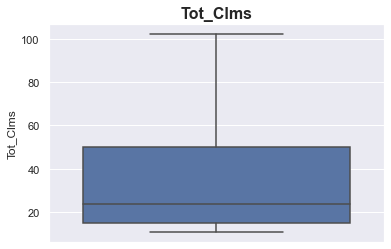

count    100000.000000
mean         87.290764
std         166.248219
min          11.000000
25%          21.000000
50%          38.000000
70%          68.000000
75%          82.200000
max       10676.600000
Name: Tot_30day_Fills, dtype: float64


Text(0.5, 1.0, 'Tot_30day_Fills')

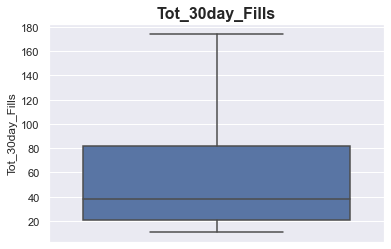

count    100000.000000
mean       2451.303580
std        4791.945508
min          11.000000
25%         480.000000
50%        1020.000000
70%        1890.000000
75%        2311.000000
max      226734.000000
Name: Tot_Day_Suply, dtype: float64


Text(0.5, 1.0, 'Tot_Day_Suply')

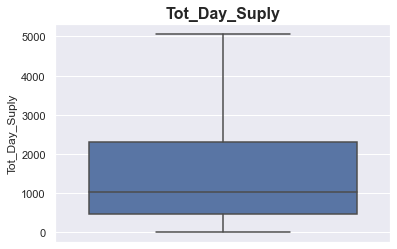

count    1.000000e+05
mean     5.375655e+03
std      3.278353e+04
min      0.000000e+00
25%      2.622800e+02
50%      6.724000e+02
70%      1.604704e+03
75%      2.160662e+03
max      2.611509e+06
Name: Tot_Drug_Cst, dtype: float64


Text(0.5, 1.0, 'Tot_Drug_Cst')

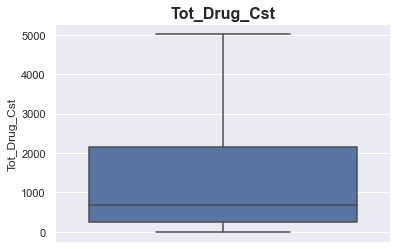

count    42001.000000
mean        30.162210
std         33.088777
min         11.000000
25%         14.000000
50%         20.000000
70%         29.000000
75%         33.000000
max       1046.000000
Name: Tot_Benes, dtype: float64


Text(0.5, 1.0, 'Tot_Benes')

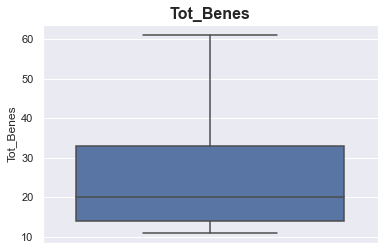

count    55329.000000
mean        49.901842
std        102.668020
min          0.000000
25%         13.000000
50%         22.000000
70%         39.000000
75%         47.000000
max       9998.000000
Name: GE65_Tot_Clms, dtype: float64


Text(0.5, 1.0, 'GE65_Tot_Clms')

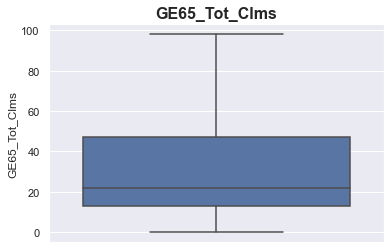

count    55329.000000
mean        88.346075
std        179.615427
min          0.000000
25%         18.000000
50%         36.000000
70%         65.700000
75%         81.000000
max      10002.400000
Name: GE65_Tot_30day_Fills, dtype: float64


Text(0.5, 1.0, 'GE65_Tot_30day_Fills')

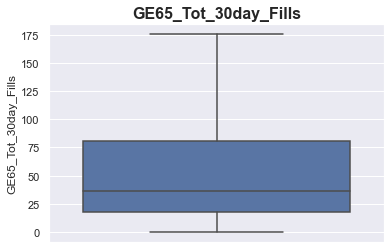

count    5.532900e+04
mean     4.876590e+03
std      3.060906e+04
min      0.000000e+00
25%      2.248800e+02
50%      6.208600e+02
70%      1.520854e+03
75%      2.042610e+03
max      2.405400e+06
Name: GE65_Tot_Drug_Cst, dtype: float64


Text(0.5, 1.0, 'GE65_Tot_Drug_Cst')

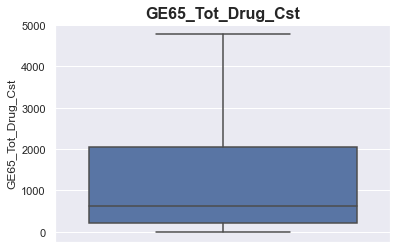

count     55329.000000
mean       2510.743100
std        5124.009007
min           0.000000
25%         433.000000
50%         990.000000
70%        1831.000000
75%        2280.000000
max      222421.000000
Name: GE65_Tot_Day_Suply, dtype: float64


Text(0.5, 1.0, 'GE65_Tot_Day_Suply')

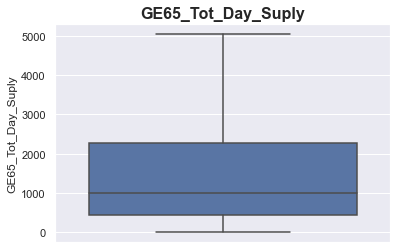

count    10193.000000
mean        33.079564
std         44.533572
min          0.000000
25%         13.000000
50%         19.000000
70%         29.000000
75%         34.000000
max       1024.000000
Name: GE65_Tot_Benes, dtype: float64


Text(0.5, 1.0, 'GE65_Tot_Benes')

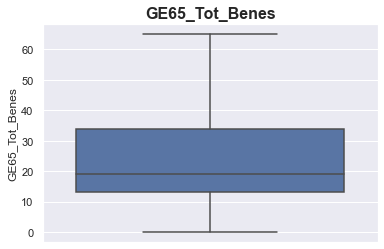

In [29]:
sns.set(style="darkgrid")
for vals in num_vals[:-1]:
    print(df_subset[vals].describe(percentiles=[.25,.50,.70,.75]))
    ax = sns.boxplot(y=df_subset[vals],showfliers=False) ## keeping showfliers=False just to see the meadian value and the data distibution 
    plt.title(vals, weight='bold', FontSize = 16)
    plt.show();
    

## Inferences

## Checking the number of frauds present in the sample set 

In [30]:
df_subset['is_fraud'] = df_subset['is_fraud'].fillna(0)
df_subset['is_fraud'].value_counts()

0.0    99976
1.0       24
Name: is_fraud, dtype: int64

## Univariate - categorical Variables

In [31]:
## copy the dataset and segrigate to see the spread by clubbing catagories with lessthan equalto 5% into group others 
df_cpy =df_subset.copy()

In [32]:
def Segrigate (Val,threshold =0.005):
    
    df_cpy[Val].value_counts(dropna=False,normalize=True)
    plt.figure(figsize=(5, 5))
    count_df= df_cpy[Val].value_counts(dropna=False,normalize=True)
    count_df=count_df.to_frame()
    count_df=count_df[count_df[Val]<threshold]
    to_replace= count_df.index
    to_replace
    df_cpy[Val] = df_cpy[Val].replace(to_replace, 'Others')
    df_cpy[Val] = df_cpy[Val].astype('object')
    df_cpy[Val].value_counts(dropna=False,normalize=True).plot(kind='bar',color='turquoise',legend=True,fontsize=11,grid=True);

In [33]:
cat_vals

['Prscrbr_Last_Org_Name',
 'Prscrbr_First_Name',
 'Prscrbr_City',
 'Prscrbr_State_Abrvtn',
 'Prscrbr_State_FIPS',
 'Prscrbr_Type',
 'Prscrbr_Type_Src',
 'Brnd_Name',
 'Gnrc_Name',
 'GE65_Sprsn_Flag',
 'GE65_Bene_Sprsn_Flag']

In [34]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 16923230 to 19600933
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Prscrbr_NPI            100000 non-null  int64  
 1   Prscrbr_Last_Org_Name  100000 non-null  object 
 2   Prscrbr_First_Name     100000 non-null  object 
 3   Prscrbr_City           100000 non-null  object 
 4   Prscrbr_State_Abrvtn   100000 non-null  object 
 5   Prscrbr_State_FIPS     100000 non-null  object 
 6   Prscrbr_Type           100000 non-null  object 
 7   Prscrbr_Type_Src       100000 non-null  object 
 8   Brnd_Name              100000 non-null  object 
 9   Gnrc_Name              100000 non-null  object 
 10  Tot_Clms               100000 non-null  float64
 11  Tot_30day_Fills        100000 non-null  float64
 12  Tot_Day_Suply          100000 non-null  float64
 13  Tot_Drug_Cst           100000 non-null  float64
 14  Tot_Benes              4200

Family Practice                     26928
Internal Medicine                   24396
Nurse Practitioner                  15228
Physician Assistant                  6274
Cardiology                           3031
                                    ...  
Community Health Worker                 1
Undersea and Hyperbaric Medicine        1
Neurological Surgery                    1
Homeopath                               1
Psychoanalyst                           1
Name: Prscrbr_Type, Length: 108, dtype: int64

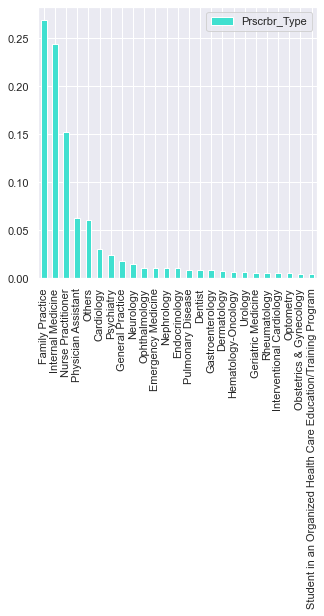

In [35]:
#for vals in cat_vals:
df_subset['Prscrbr_Type'].value_counts()
Segrigate('Prscrbr_Type')

## Inference 
- The maximum Prscrbr_Type are Family Practice.

In [36]:

df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 16923230 to 19600933
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Prscrbr_NPI            100000 non-null  int64  
 1   Prscrbr_Last_Org_Name  100000 non-null  object 
 2   Prscrbr_First_Name     100000 non-null  object 
 3   Prscrbr_City           100000 non-null  object 
 4   Prscrbr_State_Abrvtn   100000 non-null  object 
 5   Prscrbr_State_FIPS     100000 non-null  object 
 6   Prscrbr_Type           100000 non-null  object 
 7   Prscrbr_Type_Src       100000 non-null  object 
 8   Brnd_Name              100000 non-null  object 
 9   Gnrc_Name              100000 non-null  object 
 10  Tot_Clms               100000 non-null  float64
 11  Tot_30day_Fills        100000 non-null  float64
 12  Tot_Day_Suply          100000 non-null  float64
 13  Tot_Drug_Cst           100000 non-null  float64
 14  Tot_Benes              4200

In [37]:
df_subset.head()

,Prscrbr_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_City,Prscrbr_State_Abrvtn,Prscrbr_State_FIPS,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,...,Tot_Drug_Cst,Tot_Benes,GE65_Sprsn_Flag,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Bene_Sprsn_Flag,GE65_Tot_Benes,is_fraud
16923230,1669509378,Dixon,Mitra,Bellflower,CA,6,Family Practice,S,Paroxetine Hcl,Paroxetine Hcl,...,170.02,NaN,*,NaN,NaN,NaN,NaN,*,NaN,0.0
1737014,1063789865,Mehta,Swati,Albany,NY,36,Nephrology,S,Losartan Potassium,Losartan Potassium,...,119.11,NaN,#,NaN,NaN,NaN,NaN,*,NaN,0.0
13040494,1518137868,Nanavati,Rupa,San Diego,CA,6,Neurology,S,Nuplazid,Pimavanserin Tartrate,...,67071.33,NaN,NaN,19.0,19.0,67071.33,565.0,*,NaN,0.0
3323767,1134122625,Janer-Martinez,Walter,Bayamon,PR,72,Gastroenterology,S,Metoclopramide Hcl,Metoclopramide Hcl,...,399.93,17.0,NaN,26.0,26.0,264.93,780.0,#,NaN,0.0
18151700,1710266473,Johnson,Brenda,Brookings,SD,46,Nurse Practitioner,S,Cyclobenzaprine Hcl,Cyclobenzaprine Hcl,...,291.13,NaN,NaN,0.0,0.0,0.00,0.0,#,NaN,0.0


In [38]:
num_vals

['Tot_Clms',
 'Tot_30day_Fills',
 'Tot_Day_Suply',
 'Tot_Drug_Cst',
 'Tot_Benes',
 'GE65_Tot_Clms',
 'GE65_Tot_30day_Fills',
 'GE65_Tot_Drug_Cst',
 'GE65_Tot_Day_Suply',
 'GE65_Tot_Benes',
 'is_fraud']

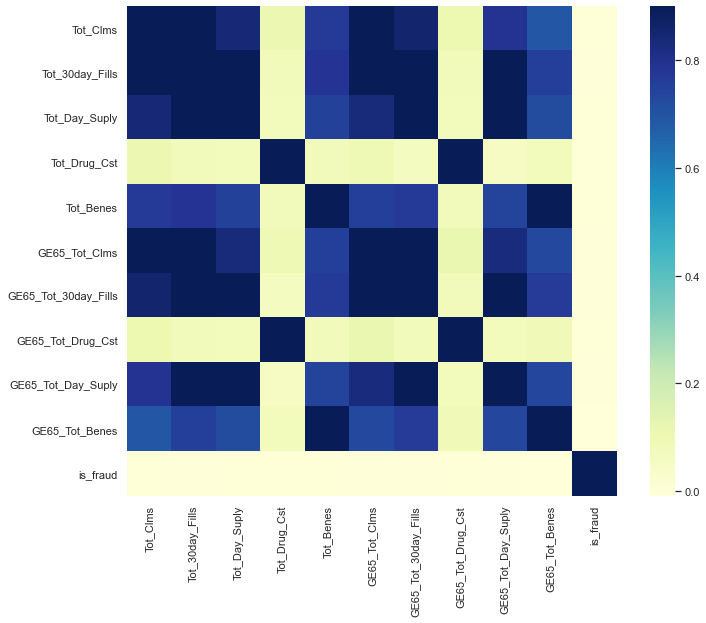

In [39]:
corrmat = df_subset[num_vals[:]].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9,cmap="YlGnBu", square=True);

In [40]:
corrmat

,Tot_Clms,Tot_30day_Fills,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Tot_Benes,is_fraud
Tot_Clms,1.000000,0.908550,0.842299,0.112111,0.769742,0.962216,0.859029,0.106505,0.787224,0.694164,-0.000334
Tot_30day_Fills,0.908550,1.000000,0.982636,0.078690,0.786113,0.910970,0.980463,0.080959,0.961045,0.755676,-0.001279
Tot_Day_Suply,0.842299,0.982636,1.000000,0.074553,0.749944,0.834371,0.960540,0.074296,0.980696,0.721586,-0.001116
Tot_Drug_Cst,0.112111,0.078690,0.074553,1.000000,0.077857,0.094080,0.062973,0.910087,0.056915,0.073711,-0.000376
Tot_Benes,0.769742,0.786113,0.749944,0.077857,1.000000,0.757743,0.771013,0.078558,0.744116,0.970121,-0.001104
GE65_Tot_Clms,0.962216,0.910970,0.834371,0.094080,0.757743,1.000000,0.911601,0.112804,0.831941,0.730604,-0.001341
GE65_Tot_30day_Fills,0.859029,0.980463,0.960540,0.062973,0.771013,0.911601,1.000000,0.082158,0.979399,0.766890,-0.001733
GE65_Tot_Drug_Cst,0.106505,0.080959,0.074296,0.910087,0.078558,0.112804,0.082158,1.000000,0.075081,0.087502,-0.000564
GE65_Tot_Day_Suply,0.787224,0.961045,0.980696,0.056915,0.744116,0.831941,0.979399,0.075081,1.000000,0.735573,-0.001632
GE65_Tot_Benes,0.694164,0.755676,0.721586,0.073711,0.970121,0.730604,0.766890,0.087502,0.735573,1.000000,-0.008298


## Inference 
- Tot_Clms seem to be highly correlated with most of the columns except GE65_Tot_Drug_Cs,GE65_Tot_Day_Suply etc .
- will  not impute anything for now and will go for few more exploration . 

## Plot between Tot_Clms and is_fraud 

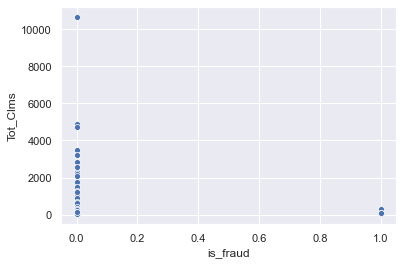

In [41]:
sns.scatterplot(data=df_subset, x='is_fraud',y='Tot_Clms');

## Plot between Tot_Clms , Tot_Drug_Cst

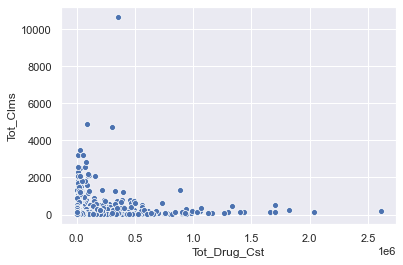

In [42]:
sns.scatterplot(data=df_subset, x='Tot_Drug_Cst',y='Tot_Clms');


### Inference
- Can't see much of relation between both  

## Plot between Tot_Clms , Tot_30day_Fills

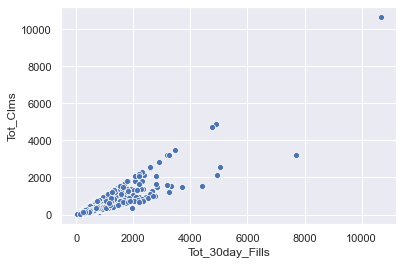

In [43]:
sns.scatterplot(data=df_subset, x='Tot_30day_Fills',y='Tot_Clms');

### Inference 
- With Increase in tot_30_fills tot_claims is increasing.

In [44]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 16923230 to 19600933
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Prscrbr_NPI            100000 non-null  int64  
 1   Prscrbr_Last_Org_Name  100000 non-null  object 
 2   Prscrbr_First_Name     100000 non-null  object 
 3   Prscrbr_City           100000 non-null  object 
 4   Prscrbr_State_Abrvtn   100000 non-null  object 
 5   Prscrbr_State_FIPS     100000 non-null  object 
 6   Prscrbr_Type           100000 non-null  object 
 7   Prscrbr_Type_Src       100000 non-null  object 
 8   Brnd_Name              100000 non-null  object 
 9   Gnrc_Name              100000 non-null  object 
 10  Tot_Clms               100000 non-null  float64
 11  Tot_30day_Fills        100000 non-null  float64
 12  Tot_Day_Suply          100000 non-null  float64
 13  Tot_Drug_Cst           100000 non-null  float64
 14  Tot_Benes              4200

## Separate X and Y 

In [45]:
out_col = 'is_fraud'
X = df_subset.drop(out_col, axis=1)
X_Id = X.pop('Prscrbr_NPI')
y = df_subset['is_fraud']
X.shape, y.shape

((100000, 21), (100000,))

## Split Train test 

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70000, 21), (30000, 21), (70000,), (30000,))

In [47]:
y_train.value_counts(normalize = True)

0.0    0.999757
1.0    0.000243
Name: is_fraud, dtype: float64

#### There exists a huge imbalance in the class 